In [1]:
import pandas as pd
import numpy as np
import os
import re
from copy import deepcopy 

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_dir = 'data/english_only/prompting_results_clean/with_metrics/' #experiment 1

In [3]:
from aggregate_metrics_helper import *

In [4]:
os.chdir('/shared/0/projects/research-jam-summer-2024/')
pd.options.mode.copy_on_write = True

In [5]:
for f in os.listdir(base_dir):
    if f.startswith('wildchat_subset_en_2k_prompting') and not f.endswith('_end.jsonl') and not f.endswith('_embeddings.npz') and not f.endswith('lexical.jsonl') and not f.endswith('MERGED.jsonl') and not f.endswith('_POS_DEP.jsonl'):
        print(f)

wildchat_subset_en_2k_prompting_Qwen2-72B-Instruct.jsonl
wildchat_subset_en_2k_prompting_c4ai-command-r-v01.jsonl
wildchat_subset_en_2k_prompting_Mixtral-8x7B-Instruct-v0.1.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3-70B-Instruct.jsonl
wildchat_subset_en_2k_prompting_Mistral-Large-Instruct.jsonl
wildchat_subset_en_2k_prompting_Phi-3-medium-4k-instruct.jsonl
wildchat_subset_en_2k_prompting_Mistral-7B-Instruct-v0.3.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3.1-8B-Instruct.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3.1-70B-Instruct.jsonl


In [6]:
def make_emb_df(f, human_prefix='human_', sim_prefix='llm_', turn_3_prefix='turn_3_'):
    print(f)
    df = pd.read_json(base_dir+f, orient='records', lines=True)
    df['model'] = re.sub('wildchat_subset_en_2k_prompting_|.jsonl|-Instruct|-instruct','',f)
    df = df[['hashed_ip','conversation_hash','model','prompt','metric_sbert','metric_luar']]
    b = np.load(base_dir+re.sub('.jsonl','_embeddings.npz',f), allow_pickle=True)
    emb = pd.DataFrame({human_prefix+'sbert': b[human_prefix+turn_3_prefix+'sbert'].tolist(),
                        sim_prefix+'sbert': b[sim_prefix+turn_3_prefix+'sbert'].tolist(),
                        human_prefix+'luar': b[human_prefix+turn_3_prefix+'luar'].tolist(),
                        sim_prefix+'luar': b[sim_prefix+turn_3_prefix+'luar'].tolist()
                        #'conversation_hash': b['conversation_hash']
                        })
    df = pd.concat([df, emb], axis=1)
    return df

In [7]:
metrics = pd.concat([make_emb_df(f) for f in os.listdir(base_dir)
                       if f.startswith('wildchat_subset_en_2k_prompting') and 
                       not f.endswith('_end.jsonl') and not f.endswith('_embeddings.npz') and 
                       not f.endswith('lexical.jsonl') and not f.endswith('MERGED.jsonl') and 
                       not f.endswith('_POS_DEP.jsonl')]).reset_index(drop=True)

wildchat_subset_en_2k_prompting_Qwen2-72B-Instruct.jsonl
wildchat_subset_en_2k_prompting_c4ai-command-r-v01.jsonl
wildchat_subset_en_2k_prompting_Mixtral-8x7B-Instruct-v0.1.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3-70B-Instruct.jsonl
wildchat_subset_en_2k_prompting_Mistral-Large-Instruct.jsonl
wildchat_subset_en_2k_prompting_Phi-3-medium-4k-instruct.jsonl
wildchat_subset_en_2k_prompting_Mistral-7B-Instruct-v0.3.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3.1-8B-Instruct.jsonl
wildchat_subset_en_2k_prompting_Meta-Llama-3.1-70B-Instruct.jsonl


In [8]:
print(metrics.shape)
print()
metrics.head()

(289531, 10)



,hashed_ip,conversation_hash,model,prompt,metric_sbert,metric_luar,human_sbert,llm_sbert,human_luar,llm_luar
0,568ecf3349b46c238268f63bcdbb2e12cd88feea3052b9...,231dc924f9bf607871bf3e5699930833,Qwen2-72B,Prompt_1,0.142251,0.283583,"[0.058730680495500565, -0.027935944497585297, ...","[0.01683928444981575, 0.11676625162363052, -0....","[0.13018760085105896, 0.248081773519516, -0.19...","[-0.2808733284473419, -0.851929247379303, 0.34..."
1,d3c81b62172c8e48ca874e118ee957e3db84d1f9b4d5b1...,edf58f8e33a00f9c374d448aad703650,Qwen2-72B,Prompt_1,0.036965,0.457443,"[0.016433479264378548, -0.010125488974153996, ...","[-0.007542246486991644, -0.08430641144514084, ...","[-0.3781570494174957, -0.3390761911869049, 0.3...","[0.6965972185134888, -0.194828599691391, -0.06..."
2,6e9b81c31754d99e4f9df95bd6317c844f444f4eedd216...,544d60f14b495ca7e7ae9dbe2ed63220,Qwen2-72B,Prompt_1,0.150455,0.471970,"[-0.04167027771472931, -0.03375384956598282, 0...","[0.00025410144007764757, 0.0863824188709259, 0...","[0.21861684322357178, 0.04622489586472511, -0....","[-0.2201990783214569, -0.31897538900375366, -0..."
3,5ed67e4bf7e0054269cd7281f76a05f7fa75bf36856ea7...,1f63b7d1807287f1d1ecfb8710075789,Qwen2-72B,Prompt_1,0.739537,0.533072,"[-0.04662158340215683, 0.0035614471416920424, ...","[-0.06962382048368454, -0.0201204102486372, -0...","[-0.02591072767972946, -0.02138587459921837, -...","[0.5467545986175537, 0.12464392185211182, -0.5..."
4,c29121a61bae1319376607d7a8475b8a7339ee288fa66c...,245490794224427cf7c4be8fdba35f8c,Qwen2-72B,Prompt_1,0.134731,0.675532,"[0.03154560178518295, -0.023224515840411186, -...","[-0.01936245523393154, 0.04322631657123566, 0....","[0.6277977228164673, 0.3861098885536194, -0.49...","[0.0921144187450409, 0.22655180096626282, 0.09..."


In [20]:
model = []; cor_sbert = []; cor_luar = []
for mod in set(metrics.model):
    print(mod)
    cond = (metrics.model == mod)
    model.append(mod)
    cor_sbert.append(col_diff_correlate(metrics['human_sbert'][cond], 
                                        metrics['llm_sbert'][cond], 
                                        'vector', 'pearson'))
    cor_luar.append(col_diff_correlate(metrics['human_luar'][cond], 
                                       metrics['llm_luar'][cond], 
                                       'vector', 'pearson'))
cor_model = pd.DataFrame({'model':model, 'cor_sbert':cor_sbert, 'cor_luar':cor_luar})

Phi-3-medium-4k
c4ai-command-r-v01
Mixtral-8x7B-v0.1
Mistral-Large
Mistral-7B-v0.3
Meta-Llama-3.1-70B
Meta-Llama-3-70B
Qwen2-72B
Meta-Llama-3.1-8B


In [ ]:
prompt = []; cor_sbert = []; cor_luar = []
for pr in set(metrics.prompt):
    print(pr)
    cond = (metrics.prompt == pr)
    prompt.append(pr)
    cor_sbert.append(col_diff_correlate(metrics['human_sbert'][cond], 
                                        metrics['llm_sbert'][cond], 
                                        'vector', 'pearson'))
    cor_luar.append(col_diff_correlate(metrics['human_luar'][cond], 
                                       metrics['llm_luar'][cond], 
                                       'vector', 'pearson'))
cor_prompt = pd.DataFrame({'prompt':prompt, 'cor_sbert':cor_sbert, 'cor_luar':cor_luar})

Prompt_47
Prompt_41
Prompt_11
Prompt_32
Prompt_43
Prompt_3
Prompt_14
Prompt_23
Prompt_19
Prompt_4
Prompt_21
Prompt_31
Prompt_26
Prompt_50
Prompt_40
Prompt_7
Prompt_24
Prompt_6
Prompt_18
Prompt_37
Prompt_13
Prompt_2
Prompt_39
Prompt_15


In [36]:
ave_cos_model = metrics.groupby(['model'])[['metric_sbert','metric_luar']].mean().reset_index()
ave_cos_prompt = metrics.groupby(['prompt'])[['metric_sbert','metric_luar']].mean().reset_index()

In [37]:
compare_df_model = ave_cos_model.merge(cor_model, on='model')
compare_df_prompt = ave_cos_prompt.merge(cor_prompt, on='prompt')

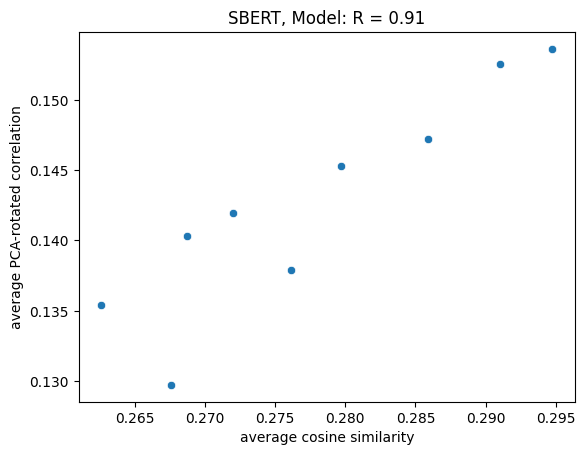

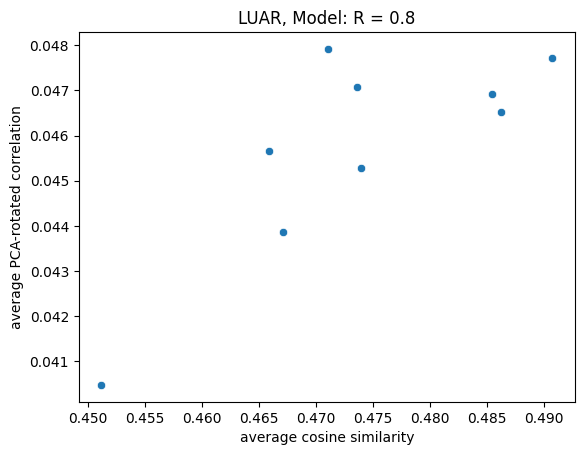

In [46]:
df = compare_df_model

sns.scatterplot(data = df, x = 'metric_sbert', y = 'cor_sbert')
plt.xlabel('average cosine similarity')
plt.ylabel('average PCA-rotated correlation')
plt.title('SBERT, Model: R = ' + 
          str(round(df[['metric_sbert','cor_sbert']].corr()['metric_sbert']['cor_sbert'],2)))
plt.show()


sns.scatterplot(data = df, x = 'metric_luar', y = 'cor_luar')
plt.xlabel('average cosine similarity')
plt.ylabel('average PCA-rotated correlation')
plt.title('LUAR, Model: R = ' + 
          str(round(df[['metric_luar','cor_luar']].corr()['metric_luar']['cor_luar'],2)))
plt.show()


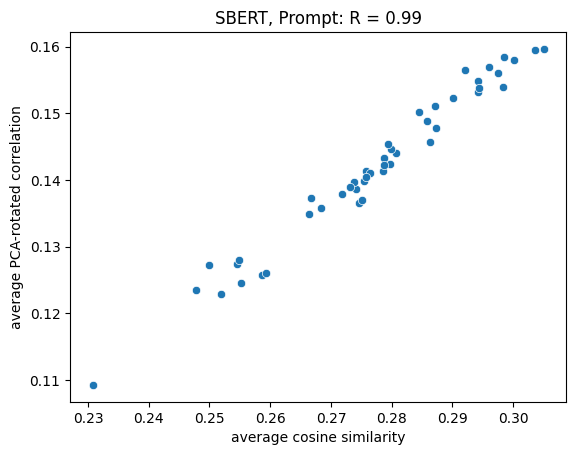

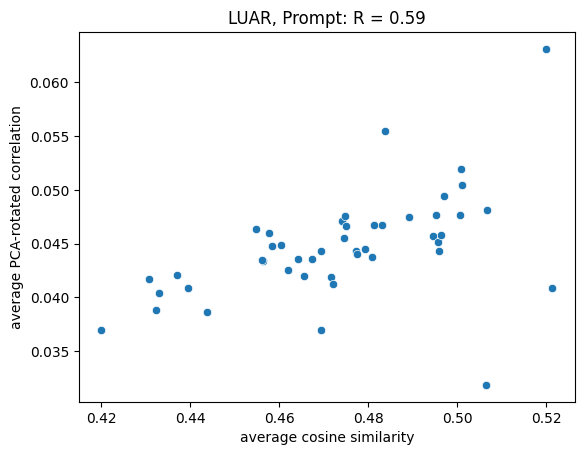

In [50]:
df = compare_df_prompt

sns.scatterplot(data = df, x = 'metric_sbert', y = 'cor_sbert')
plt.xlabel('average cosine similarity')
plt.ylabel('average PCA-rotated correlation')
plt.title('SBERT, Prompt: R = ' + 
          str(round(df[['metric_sbert','cor_sbert']].corr()['metric_sbert']['cor_sbert'],2)))
plt.show()


sns.scatterplot(data = df, x = 'metric_luar', y = 'cor_luar')
plt.xlabel('average cosine similarity')
plt.ylabel('average PCA-rotated correlation')
plt.title('LUAR, Prompt: R = ' + 
          str(round(df[['metric_luar','cor_luar']].corr('spearman')['metric_luar']['cor_luar'],2)))
plt.show()
